Different techniques in handling sckewed dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
data = data[['age','fare']]

In [4]:
data['age'] = data['age'].fillna(data.age.mean())

C:\Users\saran\AppData\Local\Temp\ipykernel_17904\3404811463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].fillna(data.age.mean())


In [11]:
def normality_check(data, feature):
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    data[feature].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist='norm', plot=plt, fit=True)
    plt.show()

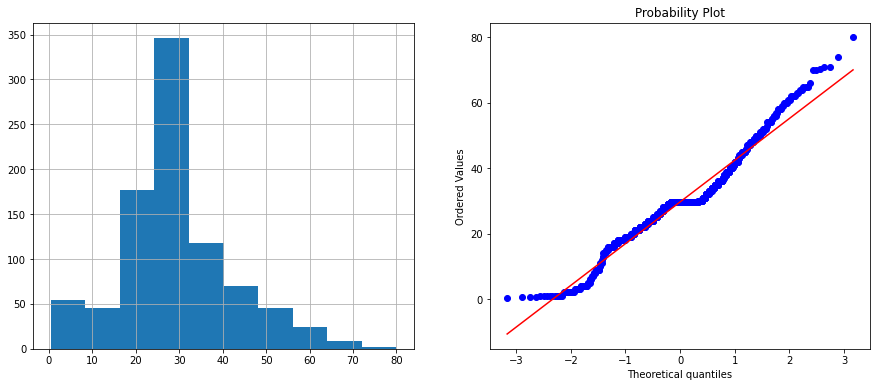

In [12]:
normality_check(data, 'age')

age is almost normally distributed

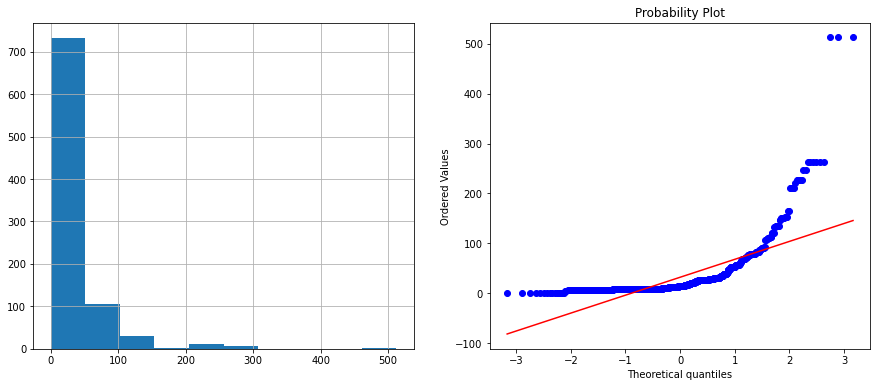

In [13]:
normality_check(data, 'fare')

fare is not normally distributed so we apply diiferent feature transformation techniques to make it normally distributed.

In [17]:
data['log_trans'] = np.log(data['fare']+1)

C:\Users\saran\AppData\Local\Temp\ipykernel_17904\3964796816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_trans'] = np.log(data['fare']+1)


log normal transformation

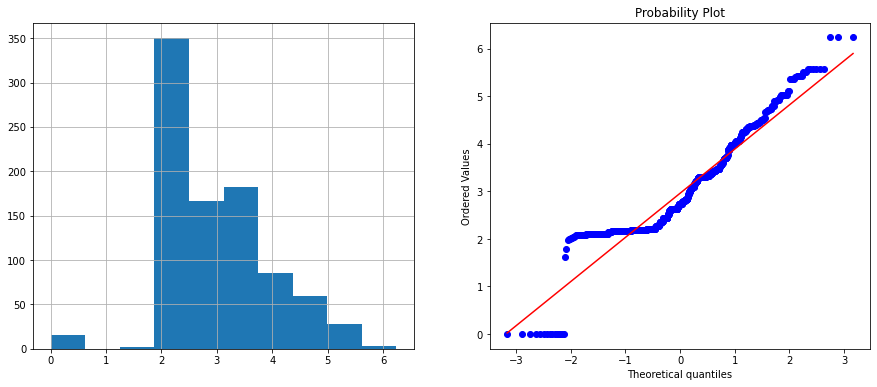

In [18]:
normality_check(data, 'log_trans')

In [20]:
data['sqrt_trans'] = np.sqrt(data['fare'])

C:\Users\saran\AppData\Local\Temp\ipykernel_17904\1485118759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqrt_trans'] = np.sqrt(data['fare'])


square root transformation

In [21]:
data['transpose_trans'] = np.transpose(data['fare'])

C:\Users\saran\AppData\Local\Temp\ipykernel_17904\4150981958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transpose_trans'] = np.transpose(data['fare'])


transpose of fare 

In [22]:
data['exp_trans'] = np.exp(data['fare'])

C:\Users\saran\AppData\Local\Temp\ipykernel_17904\4275553083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['exp_trans'] = np.exp(data['fare'])


exponential transformation

In [25]:
data['box_trans'], param = stats.boxcox(data['fare']+1)
print(param)

-0.09778702818680361


C:\Users\saran\AppData\Local\Temp\ipykernel_17904\3342280133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['box_trans'], param = stats.boxcox(data['fare']+1)


Box Cox transformation using scipy

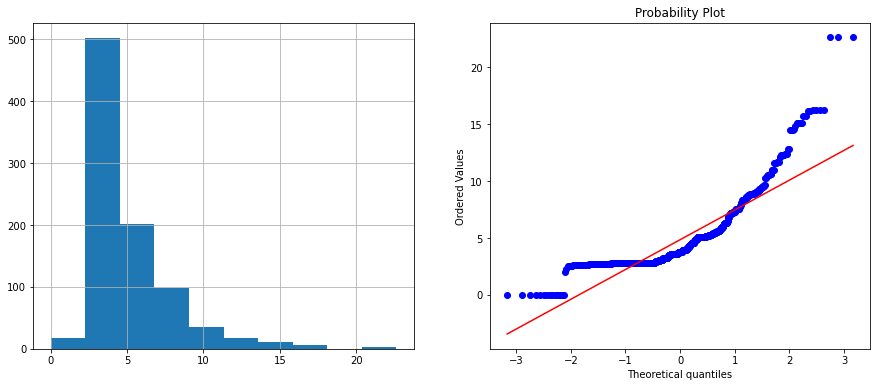

In [26]:
normality_check(data,'sqrt_trans')

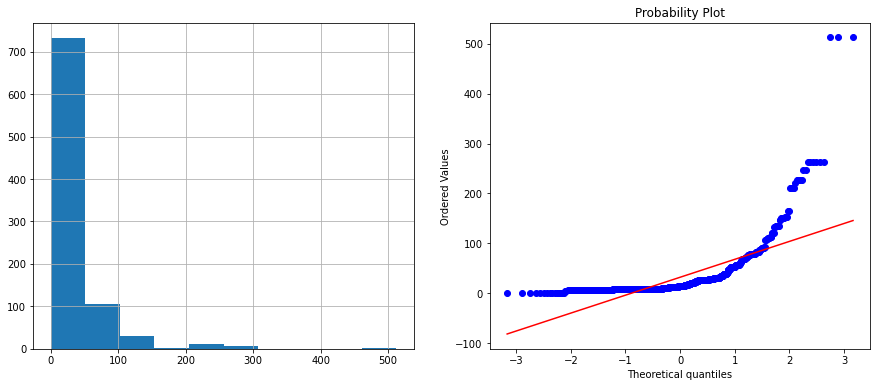

In [27]:
normality_check(data, 'transpose_trans')

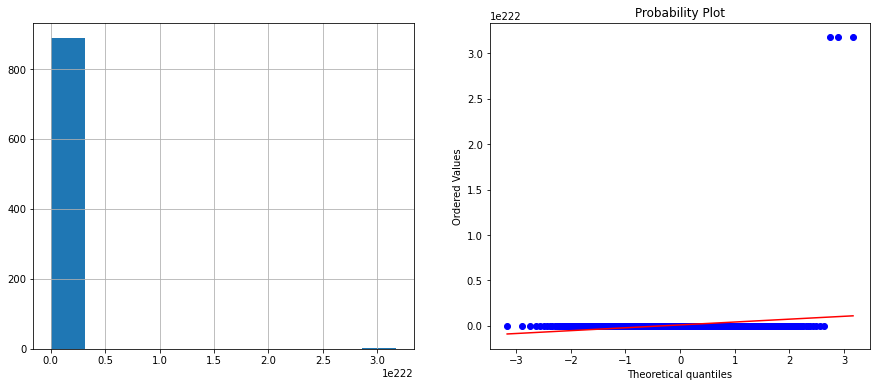

In [28]:
normality_check(data, 'exp_trans')

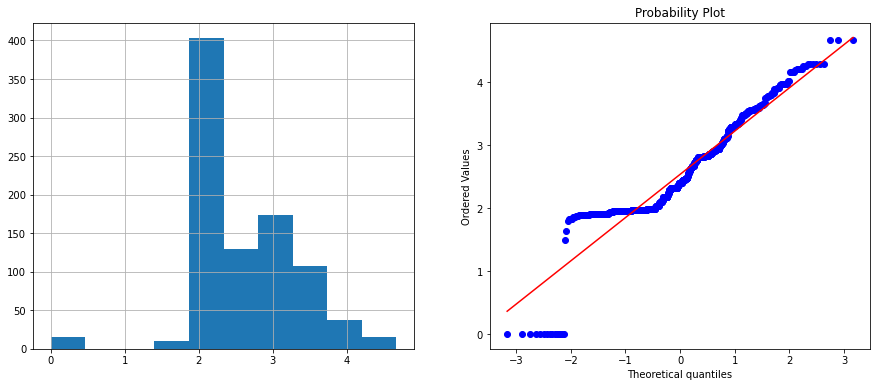

In [29]:
normality_check(data, 'box_trans')